In [57]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\Honors\Downloads\movies.csv')


In [58]:
# Look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [59]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [60]:
# Data types for our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [61]:
#Data Types for our columns
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [68]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [63]:
# Create correct year column

df['yearcorrect'] = df['released'].astype('str').str[:4]

In [64]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [65]:
# Order our Data a little bit to see

df = df.sort_values(by=['gross'],inplace = False,ascending=False)

In [66]:
pd.set_option('display.max_row',None)

In [69]:
# Drop any duplicates

df.drop_duplicates().head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [22]:
# Budget high correlation
# company high correlation ?

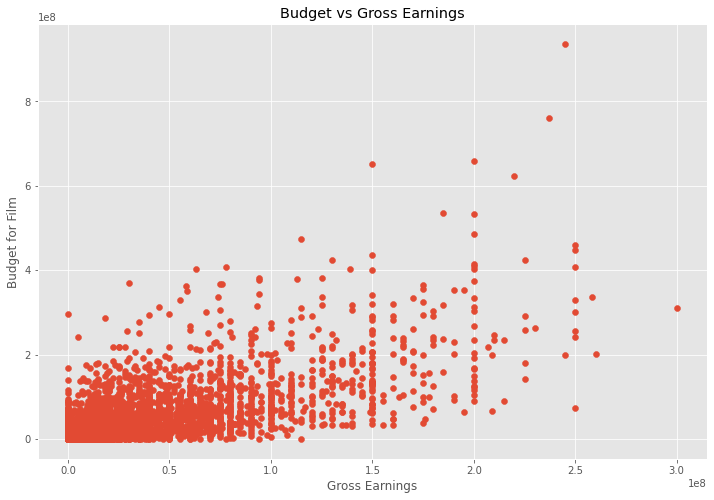

In [29]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'],y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel("Gross Earnings")
plt.ylabel('Budget for Film')
plt.show()

In [28]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

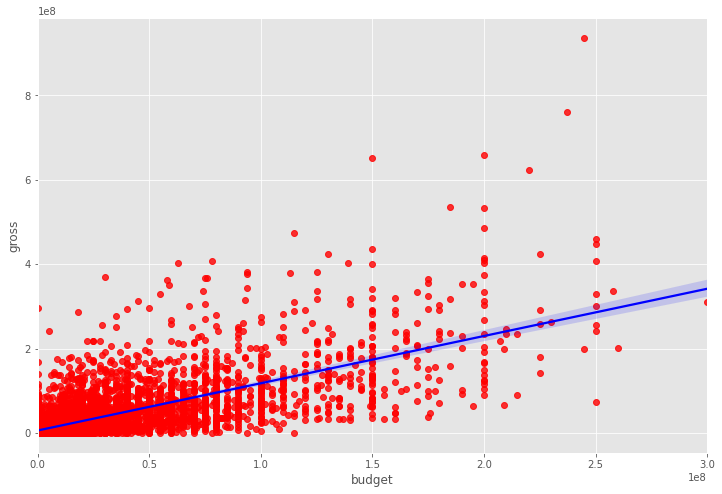

In [32]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y = 'gross', data = df, scatter_kws={'color':"red"}, line_kws= {'color':"blue"})

In [33]:
# Let's start looking at correlation

In [38]:
df.corr(method='pearson') 

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [39]:
# High Correlation between budget and gross

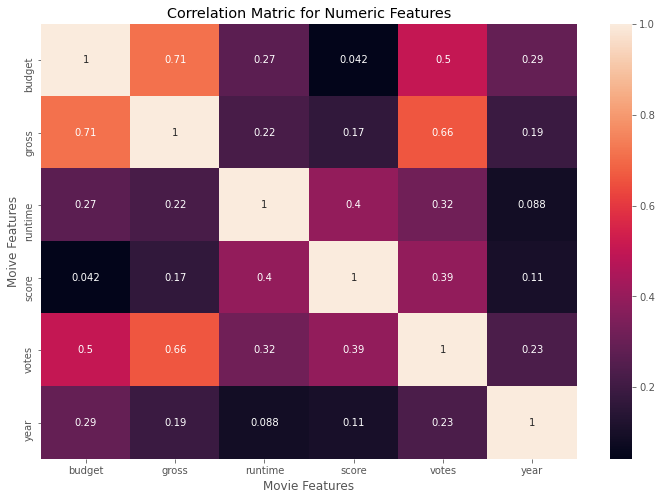

In [42]:
correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel("Movie Features")

plt.ylabel("Moive Features")

plt.show()

In [43]:
# Look at Company

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [70]:
#Changing types for correlation

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26


In [46]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,54,1037,0,936662225,4679,7,29,136,8.1,475,687192,2356,2015,29
5061,237000000,Twentieth Century Fox Film Corporation,53,1066,0,760507625,501,7,23,162,7.8,2084,954412,1629,2009,23
2420,200000000,Twentieth Century Fox Film Corporation,54,1066,6,658672302,6177,7,11,194,7.8,1444,862554,1629,1997,11
6391,150000000,Universal Pictures,54,466,0,652270625,2721,7,29,124,7.0,404,469200,3310,2015,29
5723,220000000,Marvel Studios,54,1412,0,623357910,4995,7,26,143,8.1,2001,1064633,2145,2012,26


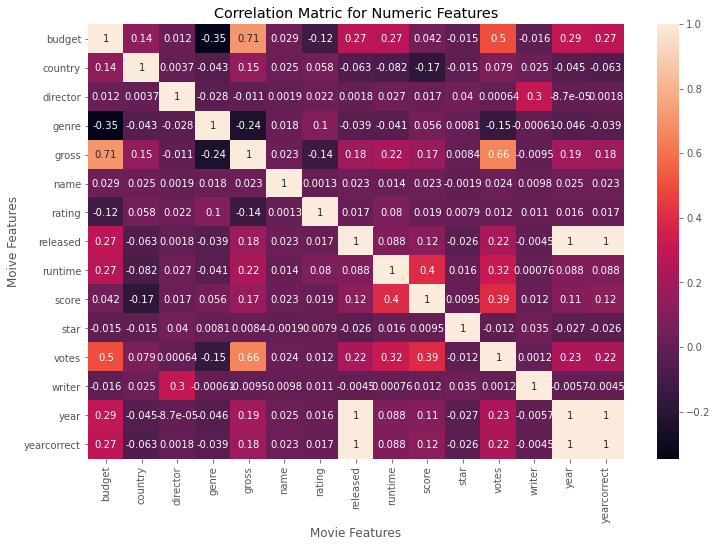

In [47]:
correlation_matrix = df_numerized.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel("Movie Features")

plt.ylabel("Moive Features")

plt.show()

In [49]:
df_numerized.corr()

,budget,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.274820,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,0.274820
country,0.137635,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062707,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.062707
director,0.011602,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001823,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,0.001823
genre,-0.346794,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039014,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.176879,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.023411,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.017438,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,0.017438
released,0.274820,-0.062707,0.001823,-0.039014,0.176879,0.023411,0.017438,1.000000,0.088342,0.117679,-0.026052,0.220797,-0.004546,0.996229,1.000000
runtime,0.268226,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.088342,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342
score,0.042145,-0.174414,0.017130,0.056234,0.165693,0.023342,0.019271,0.117679,0.395343,1.000000,0.009483,0.393607,0.012223,0.105276,0.117679


In [50]:
#Sorting the correlation
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             country        0.137635
             director       0.011602
             genre         -0.346794
             gross          0.712196
             name           0.028712
             rating        -0.119660
             released       0.274820
             runtime        0.268226
             score          0.042145
             star          -0.015062
             votes          0.503924
             writer        -0.015611
             year           0.291009
             yearcorrect    0.274820
country      budget         0.137635
             country        1.000000
             director       0.003699
             genre         -0.042793
             gross          0.149988
             name           0.025020
             rating         0.057979
             released      -0.062707
             runtime       -0.081796
             score         -0.174414
             star          -0.014569
             votes          0.078657
 

In [52]:
#Sorting the correlations
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
country      score         -0.174414
score        country       -0.174414
votes        genre         -0.150519
genre        votes         -0.150519
rating       gross         -0.135538
gross        rating        -0.135538
budget       rating        -0.119660
rating       budget        -0.119660
runtime      country       -0.081796
country      runtime       -0.081796
             released      -0.062707
released     country       -0.062707
country      yearcorrect   -0.062707
yearcorrect  country       -0.062707
genre        year          -0.046259
year         genre         -0.046259
             country       -0.045204
country      year          -0.045204
             genre         -0.042793
genre        country       -0.042793
             runtime       -0.041357
runtime      genre         -0.041357
yearcorrect  genre         -0.039014
r

In [54]:
#Seeing which ones have the highest correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
budget       gross          0.712196
gross        budget         0.712196
year         yearcorrect    0.996229
yearcorrect  year           0.996229
released     year           0.996229
year         released       0.996229
yearcorrect  released       1.000000
budget       budget         1.000000
released     released       1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     yearcorrect    1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
d

In [ ]:
#Votes and Budget have the highest correlation to gross earnings

#Company has low correlation